# Basics of ML : Day2

**Table of Contents:**


>1. **Model persistence**
2. **Random Projection**
3. **SVM Kernal- Polynomial And RBF Implementation**
4. **Sigmoid function**
5. **K Nearest Neighbors**
    * **Decision Boundary for Knn**
    * **Effect of K on Decision Boundary**
    * **KNeighborsClassifier Hyper-parameters**
    * **Weighted Knn**
    * **KD Tree Algo**
    * **Ball Tree Algo**

In [1]:
import numpy as np
import pandas as pd

## Model persistence
[Tutorial](https://youtu.be/KfnhNlD8WZI)

**Save Model using pickle**

In [2]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
clf.fit(iris.data,iris.target)

SVC()

In [3]:
import pickle
s = pickle.dumps(clf)

In [4]:
clf2 = pickle.loads(s)

In [5]:
clf2

SVC()

In [6]:
clf2.predict(iris.data[34:155])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

**To save a file using pickle one needs to open a file, load it under some alias name and dump all the info of the model. This can be achieved using below code:**

In [7]:
#Saving file in storage
with open('fileName_1','wb') as file:
    pickle.dump(clf,file)

**One can load this file back again into a model using the same logic**

In [8]:
with open('fileName_1','rb') as file:
    model = pickle.load(file)

In [9]:
model

SVC()

**Save Model using joblib**

In [10]:
# from sklearn.externals import joblib
import joblib
joblib.dump(clf , 'fileName_2')

['fileName_2']

In [11]:
joblibModelOpen = joblib.load('fileName_2')

In [12]:
joblibModelOpen

SVC()

**`Conclusion`**

*Due to the time complexity involved in training large models, saving is becoming a crucial part of the data-science realm and with this article, I tried to introduce few quick ways to save them. However, it must be noted both the process works on the same concept of serialization(saving of data into its component form) and deserialization(restoring of data from the serialized chunks), thus it is advised to pickle or joblib the model from a trusted source.*

## Random Projection

The `sklearn.random_projection` module implements a simple and computationally efficient way to reduce the dimensionality of the data by trading a controlled amount of accuracy (as additional variance) for faster processing times and smaller model sizes. This module implements two types of unstructured random matrix: Gaussian random matrix and sparse random matrix.


>1. **The Johnson-Lindenstrauss lemma :**
    The lemma states that a small set of points in a high-dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved. The map used for the embedding is at least Lipschitz, and can even be taken to be an orthogonal projection.
2. **Gaussian random projection :** The GaussianRandomProjection reduces the dimensionality by projecting the original input space on a randomly generated matrix where components are drawn from the following distribution 
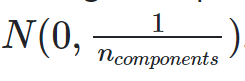

In [13]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
johnson_lindenstrauss_min_dim(n_samples=1e6, eps=0.5)

663

In [14]:
johnson_lindenstrauss_min_dim(n_samples=1e6, eps=[0.5, 0.1, 0.01])

array([    663,   11841, 1112658], dtype=int64)

In [15]:
johnson_lindenstrauss_min_dim(n_samples=[1e4, 1e5, 1e6], eps=0.1)

array([ 7894,  9868, 11841], dtype=int64)

**Reducing dimentions using `GaussianRandomProjection`**

In [16]:
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)

In [17]:
print(X.shape,X_new.shape)

(100, 10000) (100, 3947)


## SVM Kernal- Polynomial And RBF Implementation
[Tutorial](https://youtu.be/dl_ZsuHSIFE)

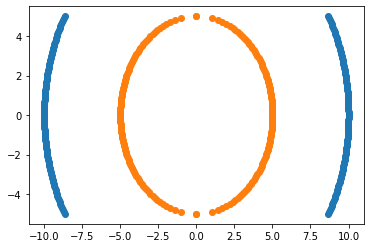

In [18]:
# Preprocessing the data and plotting
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

plt.scatter(y,x)
plt.scatter(y1,x1)

In [19]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2])
df.head(5)

X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [20]:
X = df.iloc[:, :2]  
y = df.Y

## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

from sklearn.svm import SVC
classifier=SVC(kernel="linear")
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

**Using polynomial kernel**
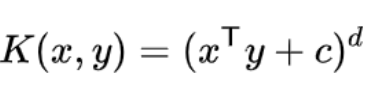

In [21]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

X1       X2  Y  X1_Square  X2_Square      X1*X2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [22]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

In [24]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [25]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [26]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [27]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

## Sigmoid function

`A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve.`

<img class="image-align-left" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f6f69aad495c133ff951475da3d2ac0de3a0f571" width="300" />

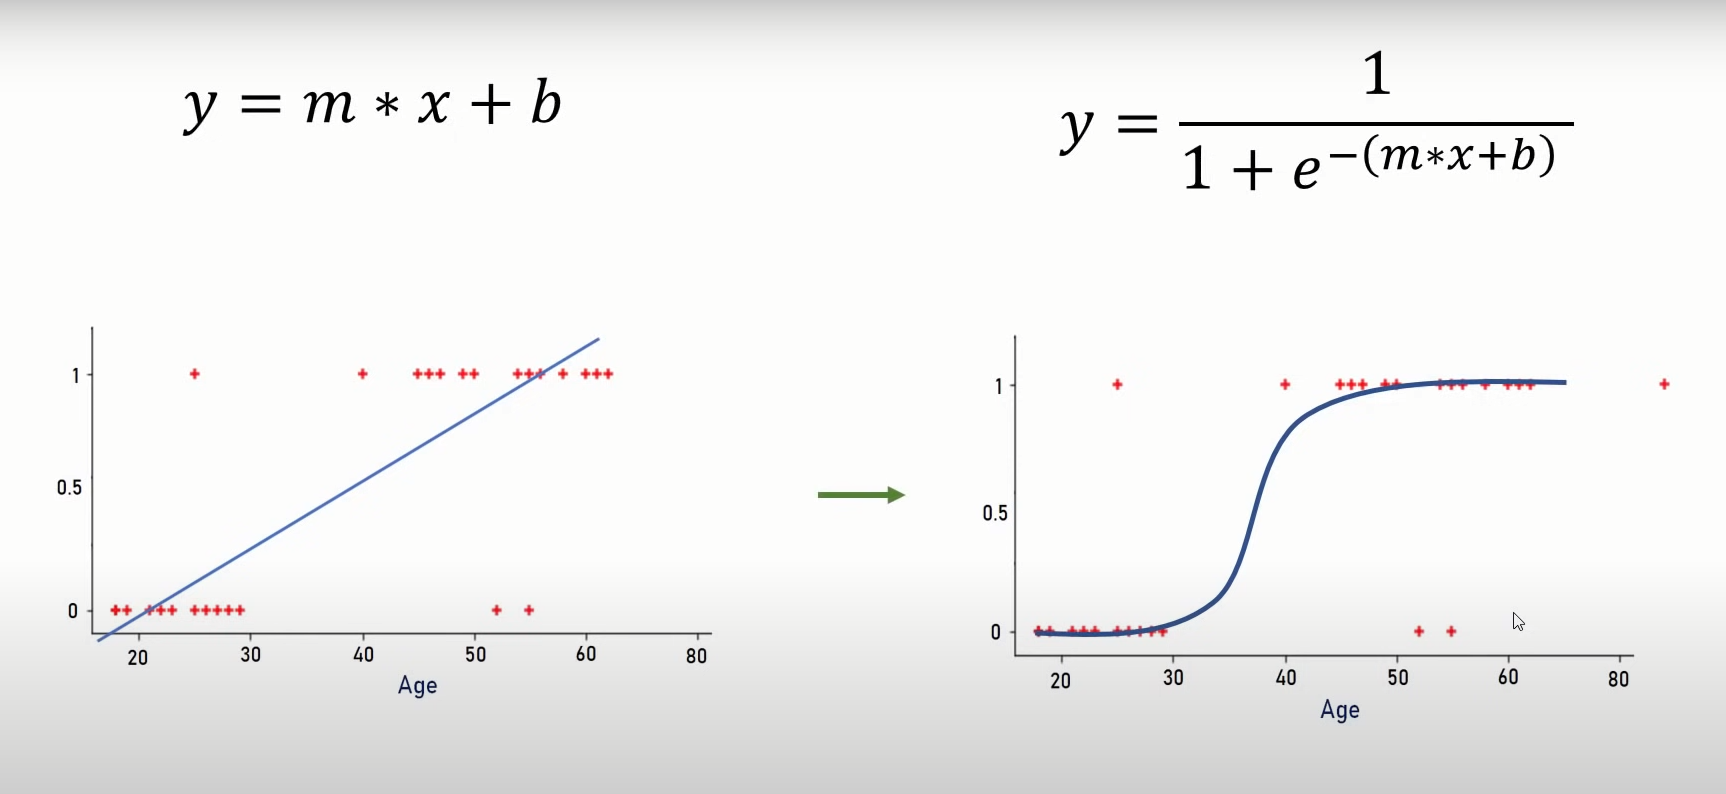

## K Nearest Neighbors


**The K-NN working can be explained on the basis of the below algorithm:**

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

In `KNN`, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an `odd number` if the number of classes is 2 and another simple approach to select k is set `k=sqrt(n)`.

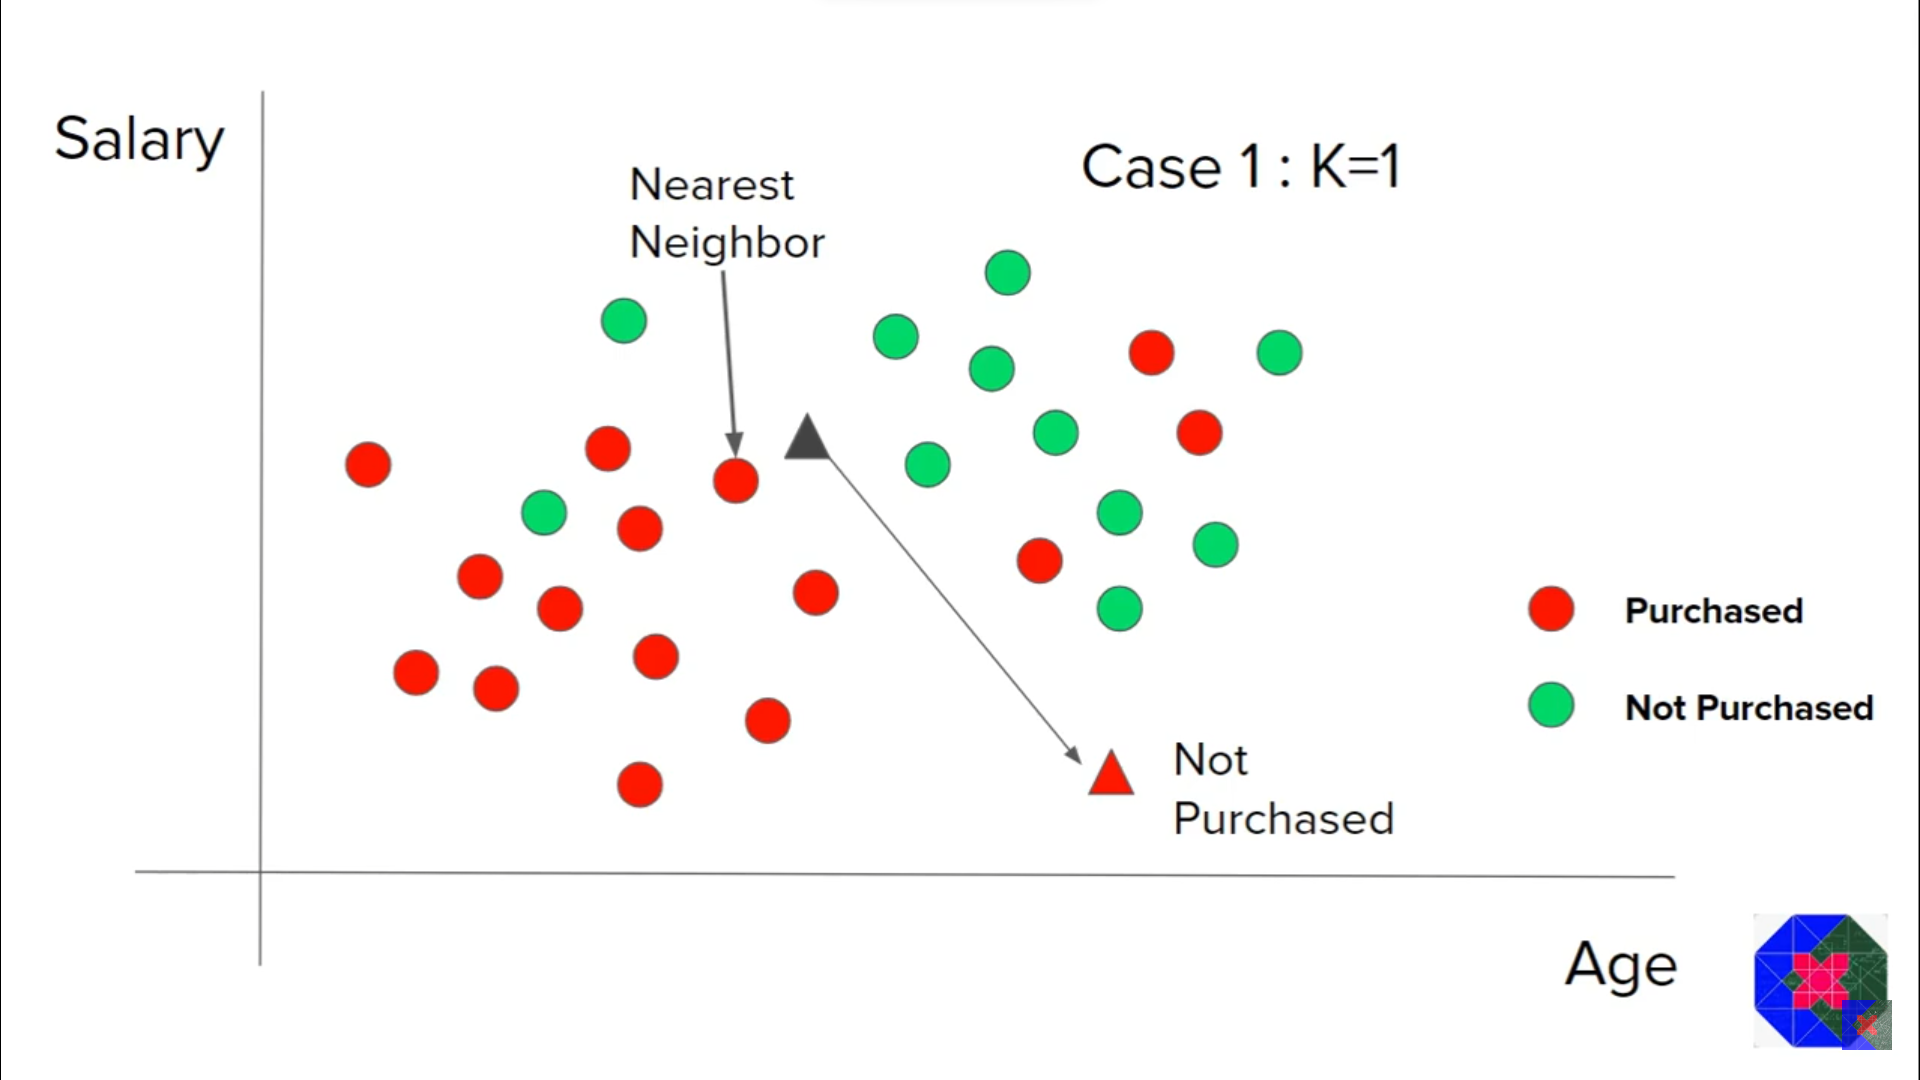

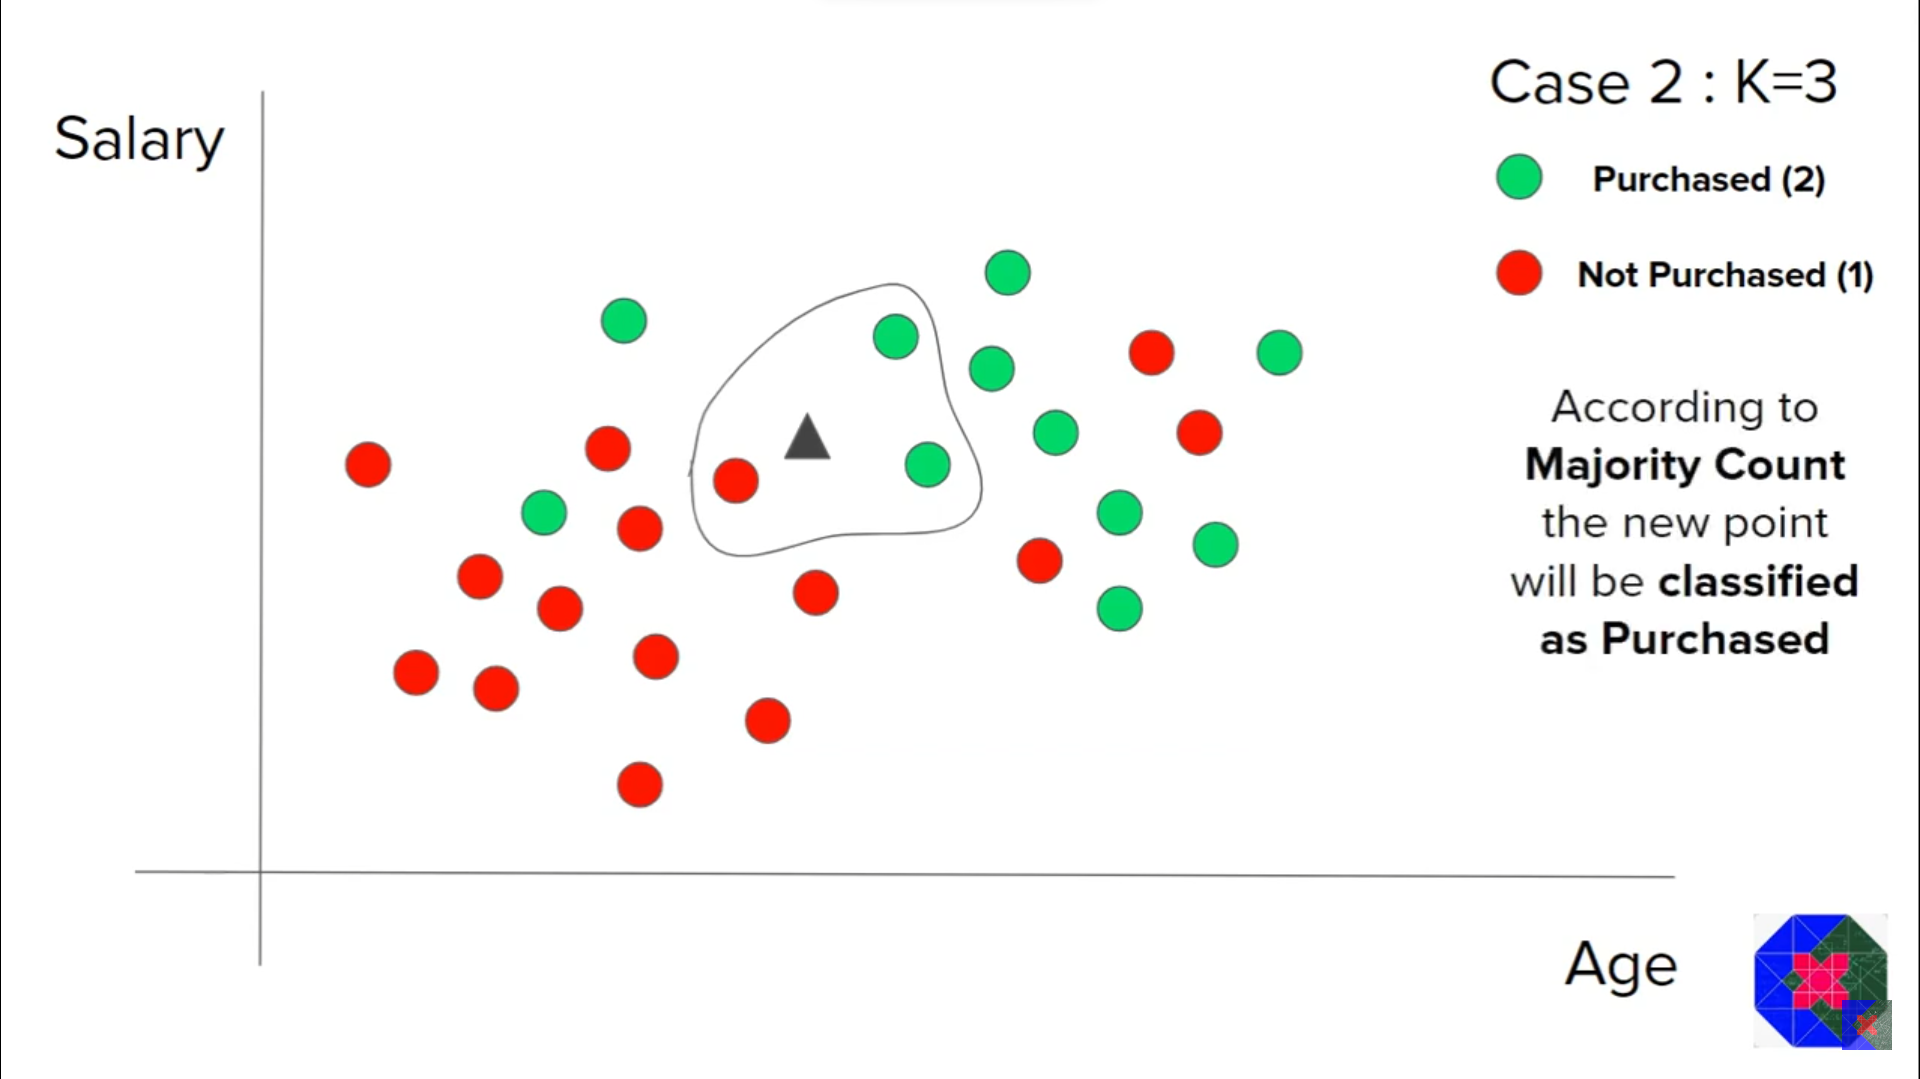

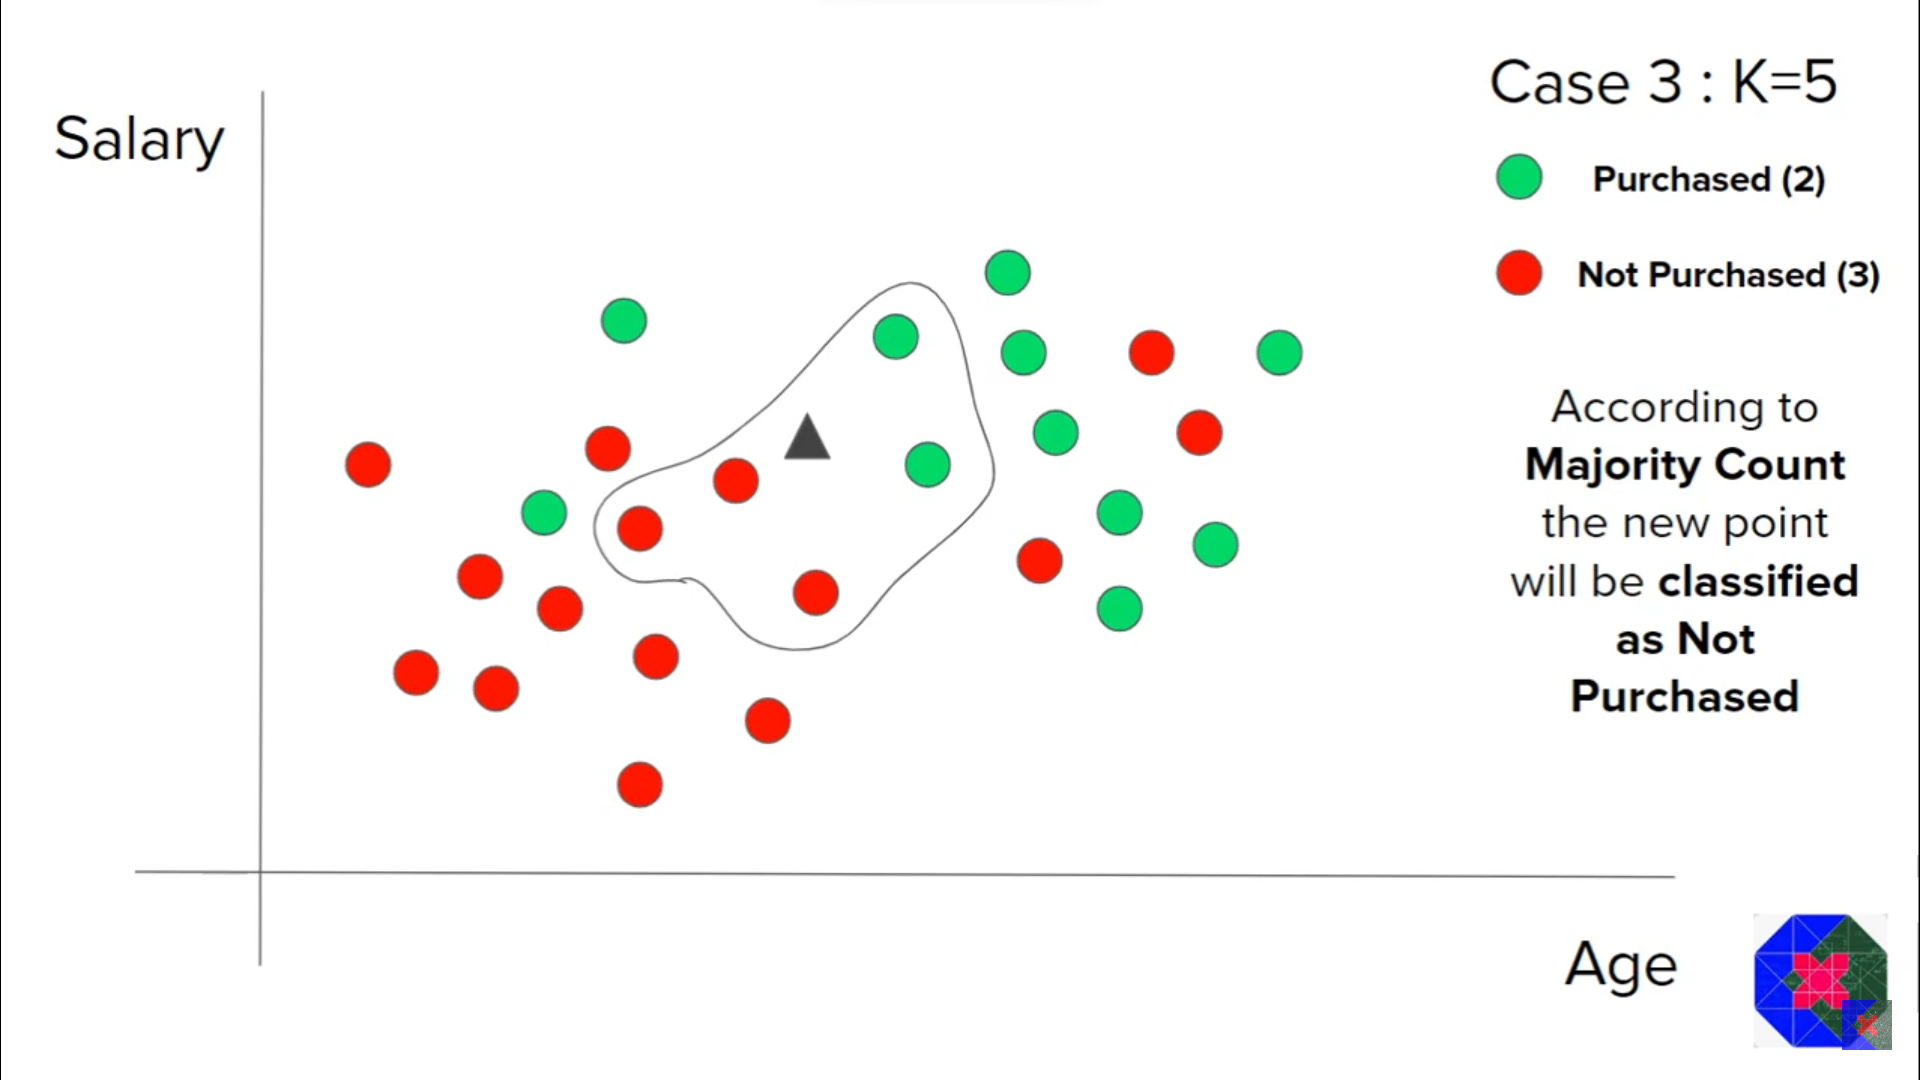


**Pros**
* It is extremely easy to implement
* As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
* Since the algorithm requires no training before making predictions, new data can be added seamlessly.
* There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)


**Cons**
* The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
* The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
* Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

In [28]:
#Applying KNN Algo

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

dataset.head()

sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [29]:
# Creating labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [30]:
# Train Test Split with 20% testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Feature Scaling**
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

>Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Evaluating the Algorithm**
>For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  0]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         7
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Comparing Error Rate with the K Value**

In [34]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Mean Error')

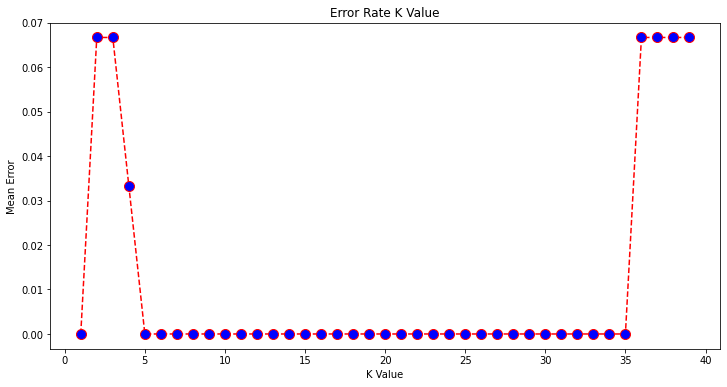

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Decision Boundary for Knn

**To make graph k-NN decision boundaries in matplotlib, we can take the following Steps.**

**Steps :**

* Set the figure size and adjust the padding between and around the subplots.

* Initialize a variable n_neighbors for number of neighbors.

* Load and return the iris dataset (classification).

* Create x and y data points.

* Make lists of dark and light colors.

* Classifier implementing the k-nearest neighbors vote.

* Create xmin, xmax, ymin and ymax  data points.

* Create a new figure or activate an existing figure.

* Create a contourf plot.

* Create a scatter plot with X dataset.

* Set x and y axes labels, titles and scale of the axes.

* To display the figure, use Show() method.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

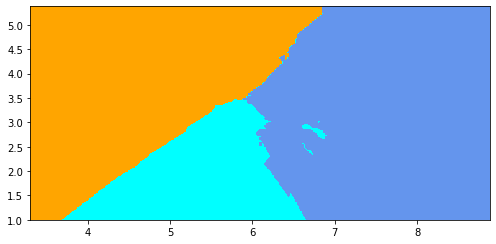

In [37]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

n_neighbors = 15
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
h = .02

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

<AxesSubplot:>

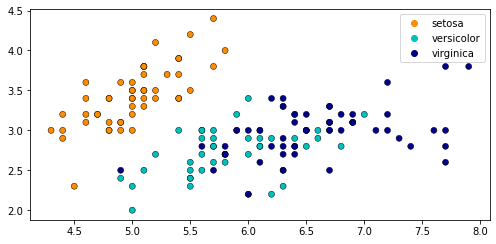

In [38]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
palette=cmap_bold, alpha=1.0, edgecolor="black")

<AxesSubplot:>

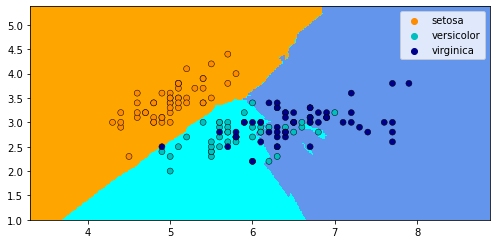

In [39]:
plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light,alpha=1.0)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
palette=cmap_bold, alpha=1.0, edgecolor="black")

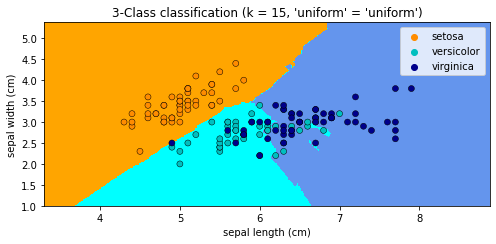

In [40]:
plt.figure()

plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
palette=cmap_bold, alpha=1.0, edgecolor="black")

plt.title("3-Class classification (k = %i, 'uniform' = '%s')"
% (n_neighbors, 'uniform'))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

## Effect of K on Decision Boundary

In [41]:
from sklearn.neighbors import KNeighborsClassifier

def keffect(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)
    df = pd.DataFrame(X,columns=['X1','X2'])
    df['Y'] = y
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(df['X1'],df['X2'],c=df['Y'].map({0:'blue',1:'green'}))
    plt.title("uniform Knn")

In [42]:
def keffect1(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1],c=y)

**Decision Boundary on Unshape Data and Different k values**

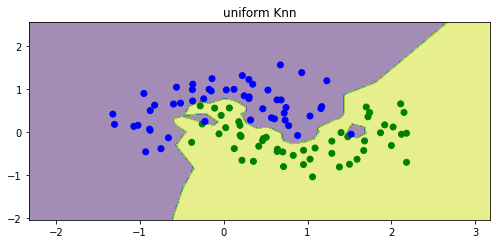

In [43]:
keffect('ushape.csv',1)

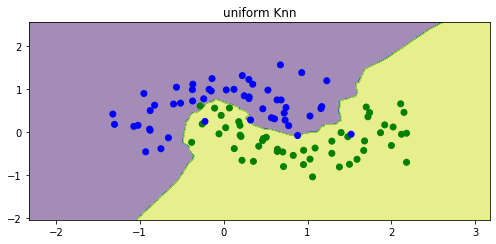

In [44]:
keffect('ushape.csv',5)

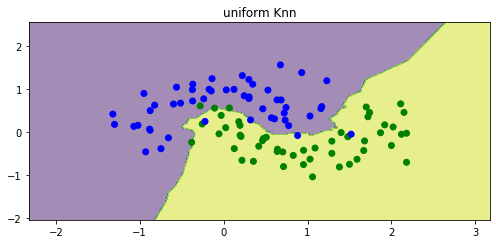

In [45]:
keffect('ushape.csv',10)

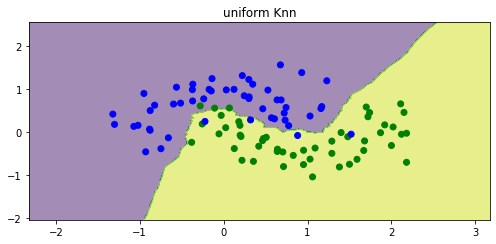

In [46]:
keffect('ushape.csv',15)

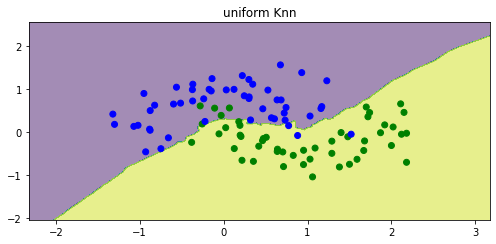

In [47]:
keffect('ushape.csv',30)

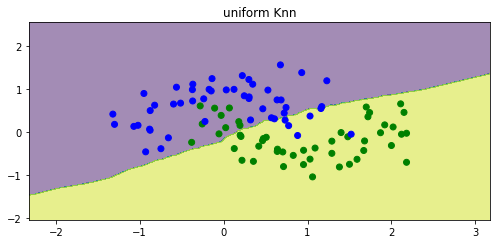

In [48]:
keffect('ushape.csv',50)

**Linear Seperation**

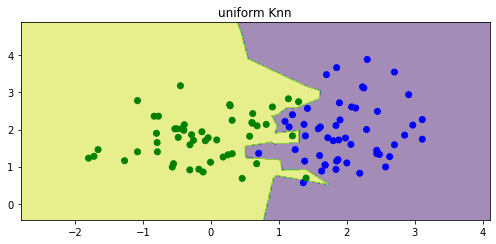

In [49]:
keffect('linearsep.csv',1)

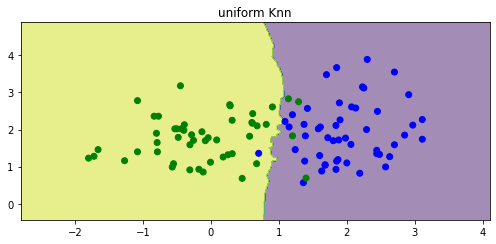

In [50]:
keffect('linearsep.csv',10)

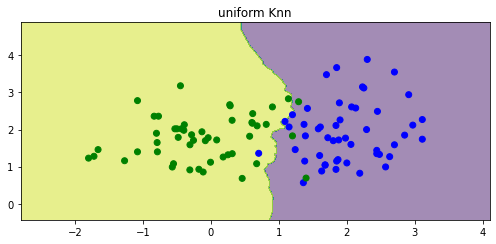

In [51]:
keffect('linearsep.csv',15)

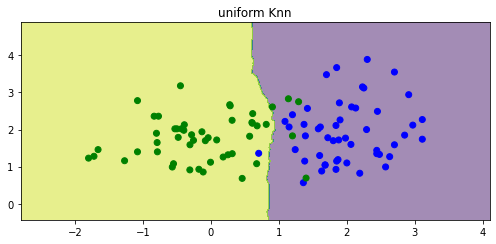

In [52]:
keffect('linearsep.csv',30)

**Concentric Circles**

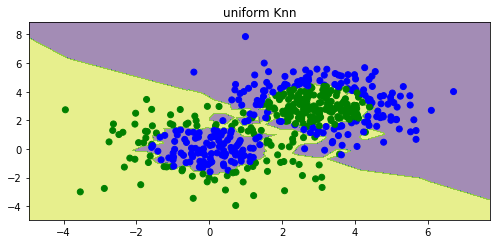

In [53]:
keffect('concertriccir2.csv',1)

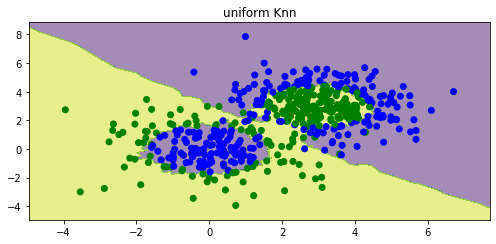

In [54]:
keffect('concertriccir2.csv',15)

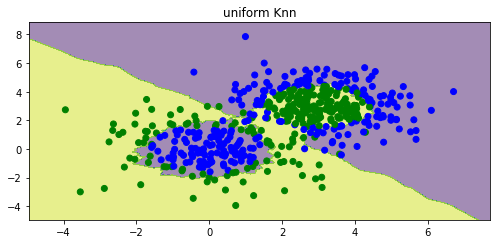

In [55]:
keffect('concertriccir2.csv',20)

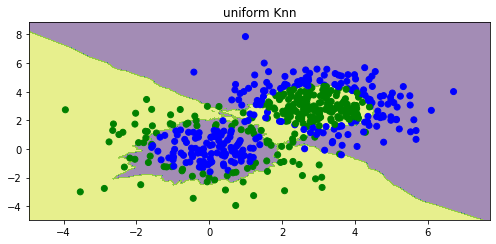

In [56]:
keffect('concertriccir2.csv',30)

**XOR Dataset**

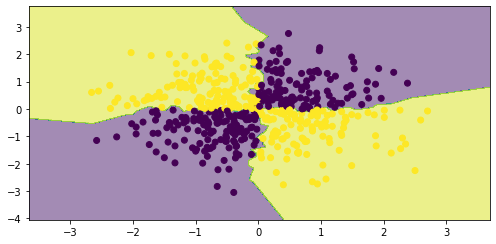

In [57]:
keffect1('xor.csv',1)

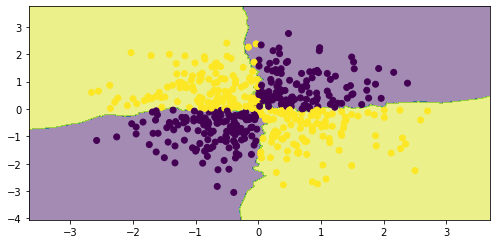

In [58]:
keffect1('xor.csv',15)

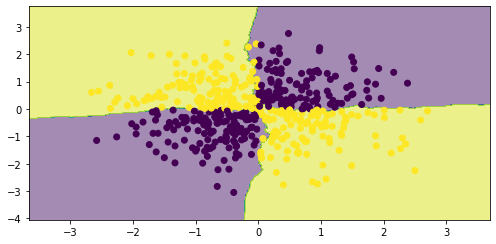

In [59]:
keffect1('xor.csv',30)

**Two Spirals**

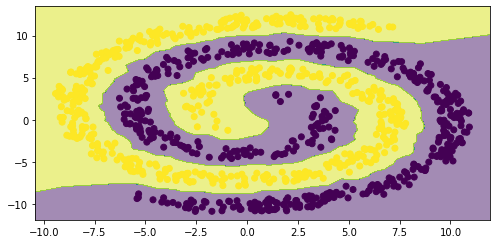

In [60]:
keffect1('twoSpirals.csv',1)

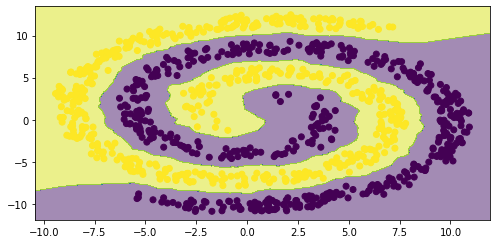

In [61]:
keffect1('twoSpirals.csv',2)

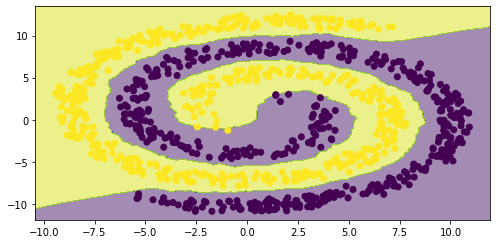

In [62]:
keffect1('twoSpirals.csv',15)

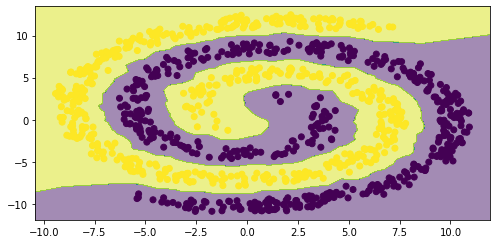

In [63]:
keffect1('twoSpirals.csv',1)

**Conclusion**

* For smaller values of K(=1) the model generally overfits and shows High Variance.
* For higher values of K(=n, where n is the no. of rows in training set), the model underfits and shows High Bias
As we increase the value of K the smoothness of Decision Boundary/Surface increases

## KNeighborsClassifier Hyper-parameters

`class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

**n_neighbors** = number of neighbors

**weight**
* uniform -> Equal weights for all neighbors distances
* distance -> weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

**algoritm**
* auto
* ball_tree
* kd_tree
* brute


[Details](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

## Weighted knn

In [64]:
from sklearn.neighbors import KNeighborsClassifier

def keffect2(data,k):
    data=pd.read_csv('toy_datasets/{}'.format(data))
    X=data.iloc[:,:2].values
    y=data.iloc[:,-1].values
    
    knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X,y)
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=knn.predict(input_array)
    df = pd.DataFrame(X,columns=['X1','X2'])
    df['Y'] = y
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.3)
    plt.scatter(df['X1'],df['X2'],c=df['Y'].map({0:'blue',1:'green'}))
    plt.title("Weighted Knn")

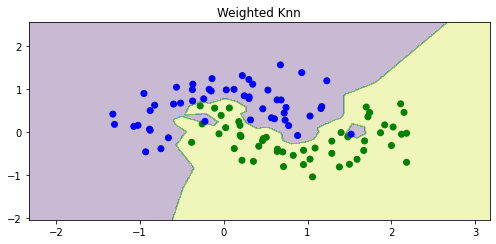

In [65]:
keffect2('ushape.csv',1)

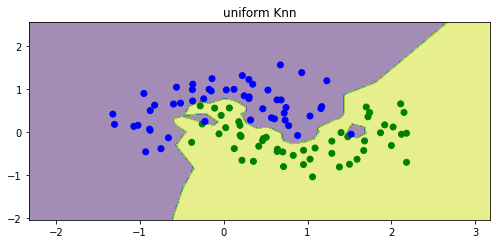

In [66]:
keffect('ushape.csv',1)

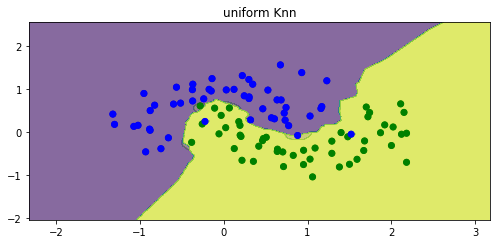

In [67]:
#Plotted weighted and Uniform in one plot to notice the difference
keffect2('ushape.csv',5)
keffect('ushape.csv',5)

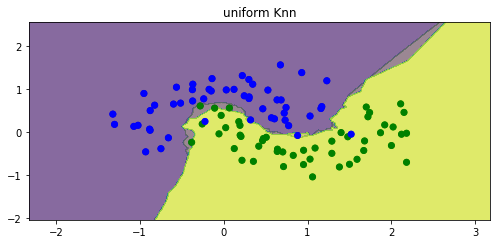

In [68]:
#Plotted weighted and Uniform in one plot to notice the difference
keffect2('ushape.csv',10)
keffect('ushape.csv',10)

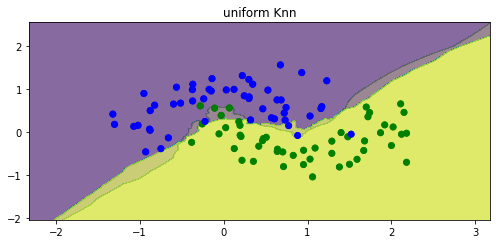

In [69]:
#Plotted weighted and Uniform in one plot to notice the difference
keffect2('ushape.csv',30)
keffect('ushape.csv',30)

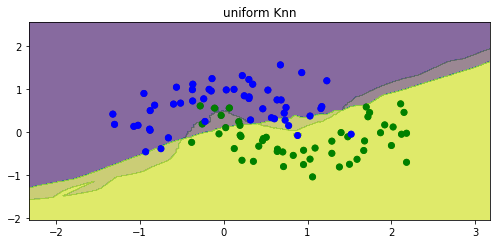

In [70]:
#Plotted weighted and Uniform in one plot to notice the difference
keffect2('ushape.csv',40)
keffect('ushape.csv',40)

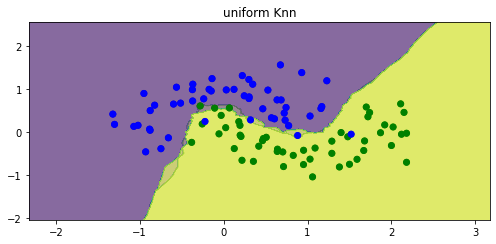

In [71]:
#Plotted weighted and Uniform in one plot to notice the difference
keffect2('ushape.csv',15)
keffect('ushape.csv',15)

## KD Tree Algo

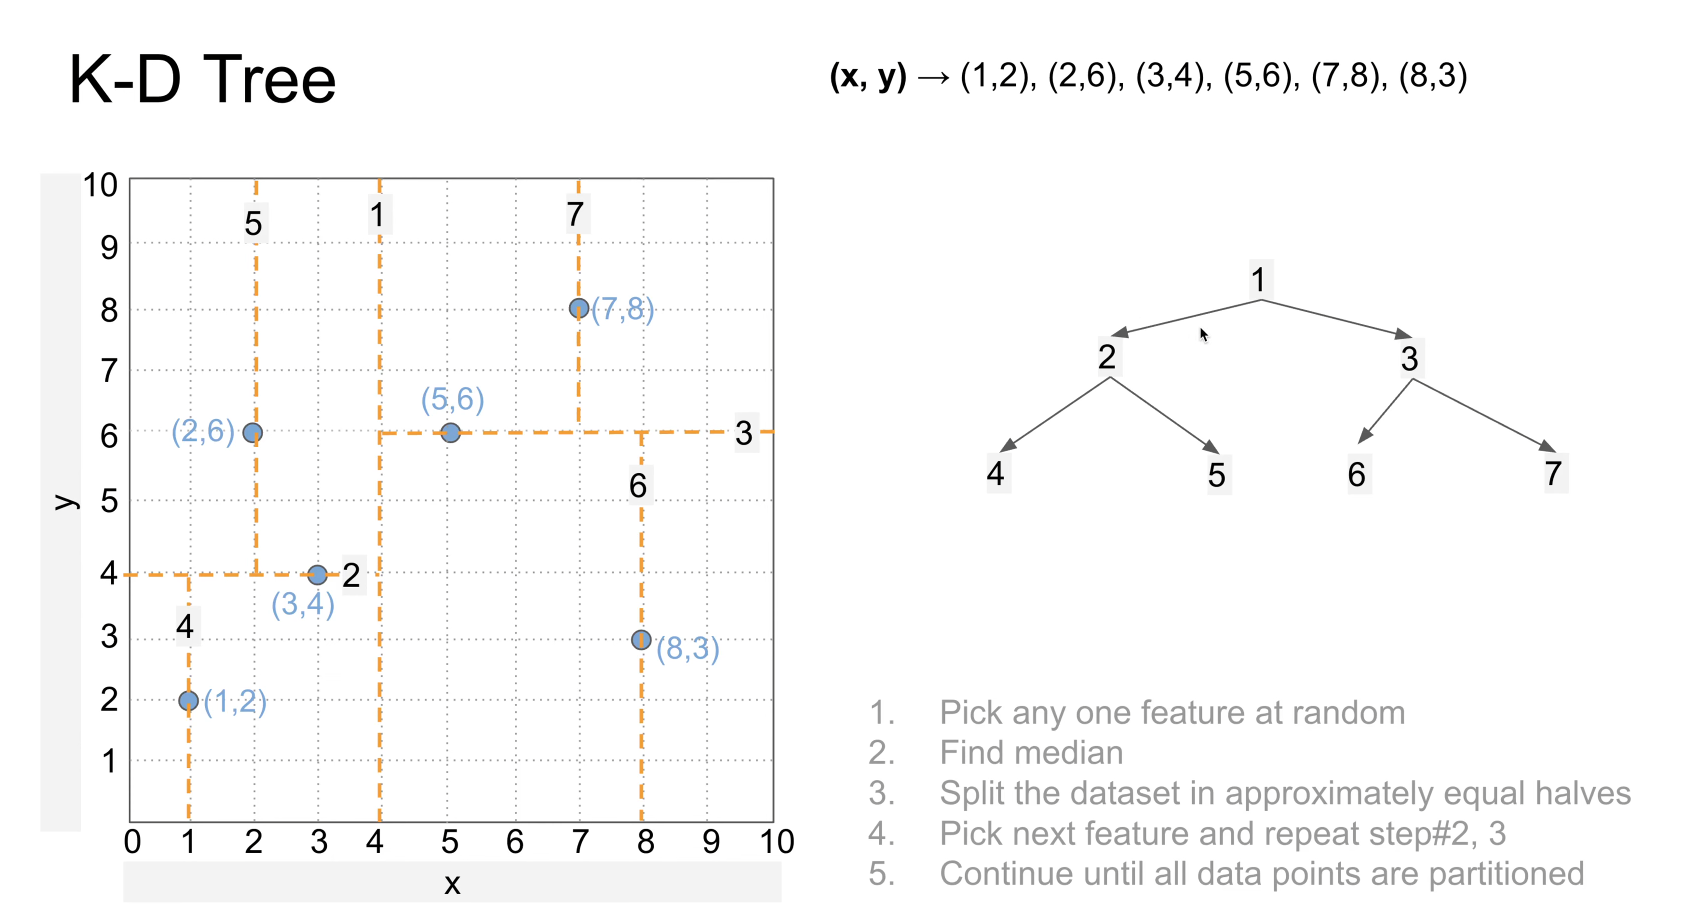

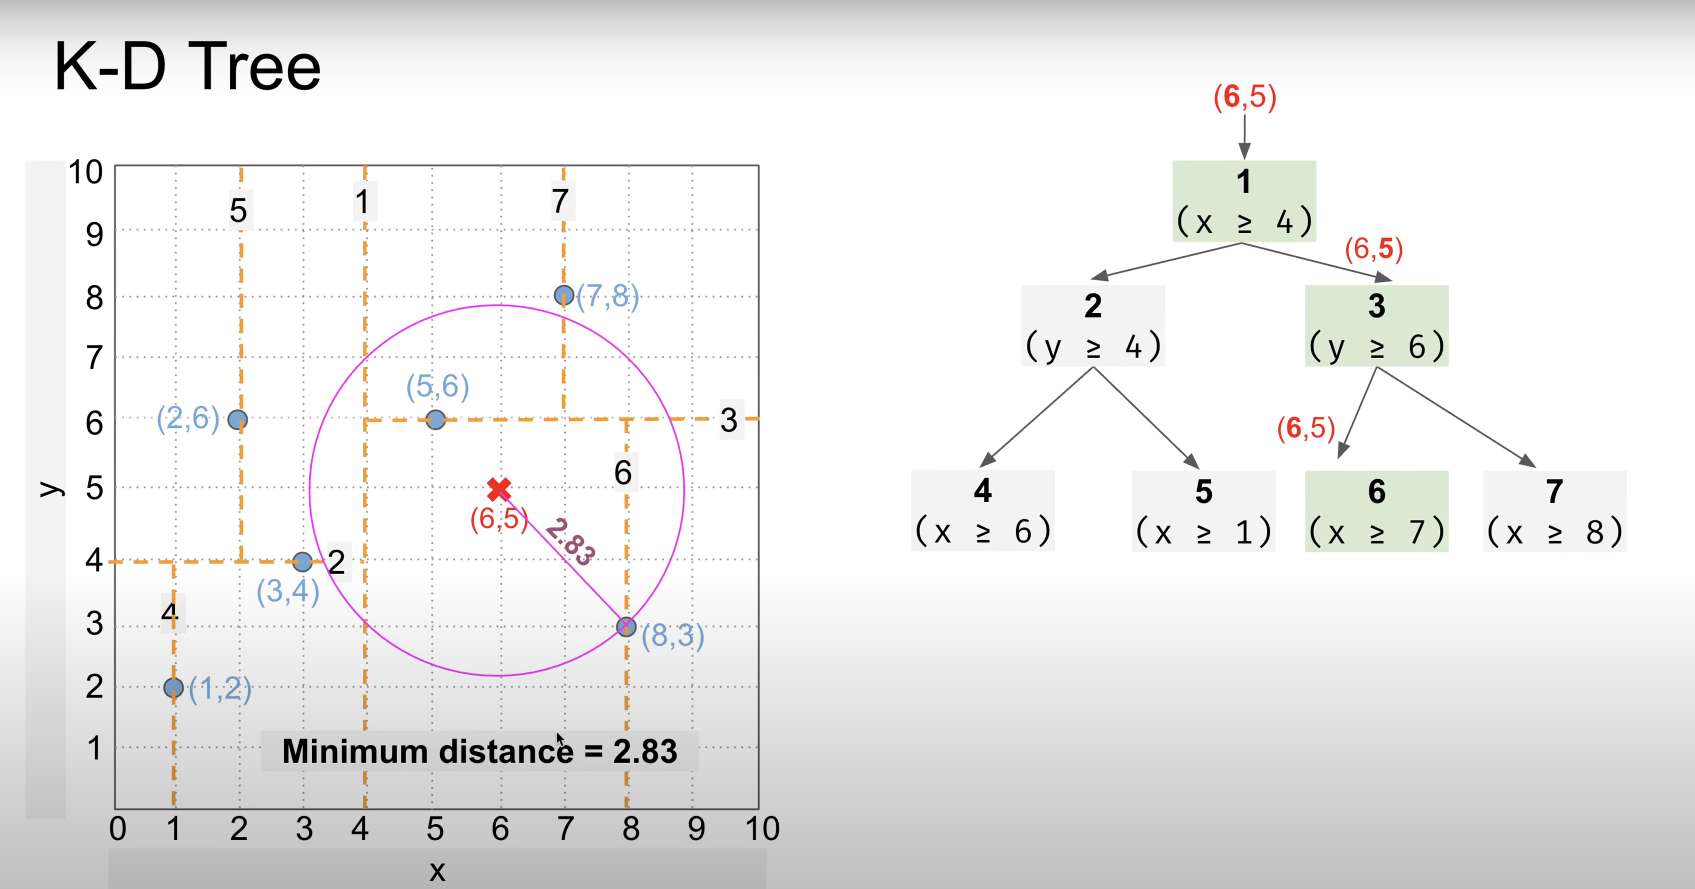

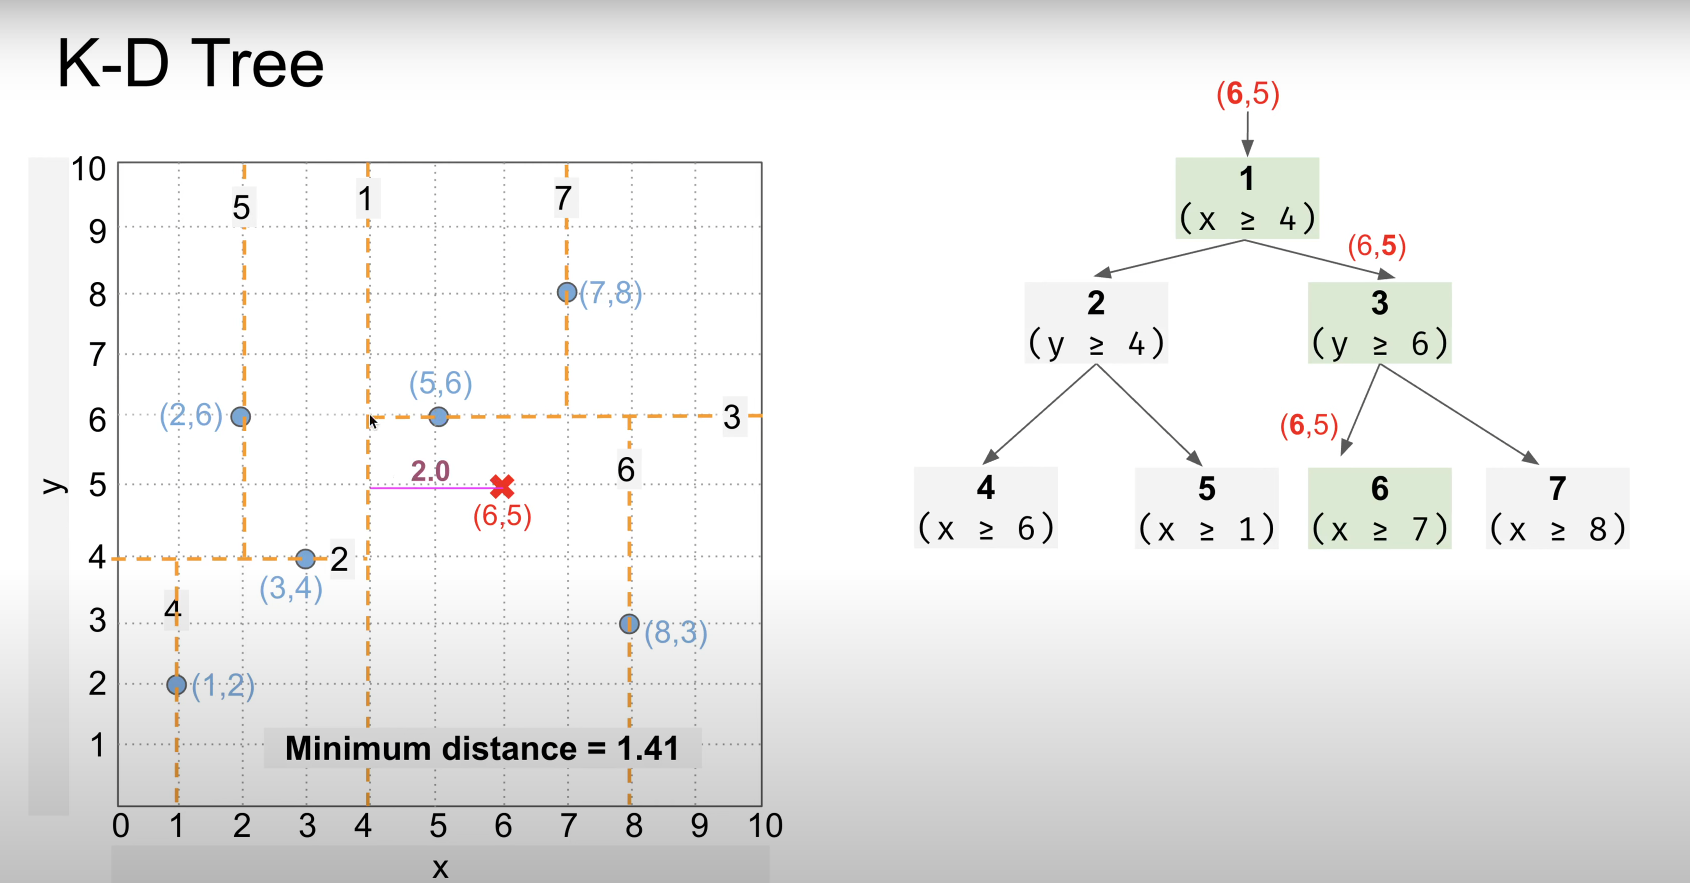

## Ball Tree Algo

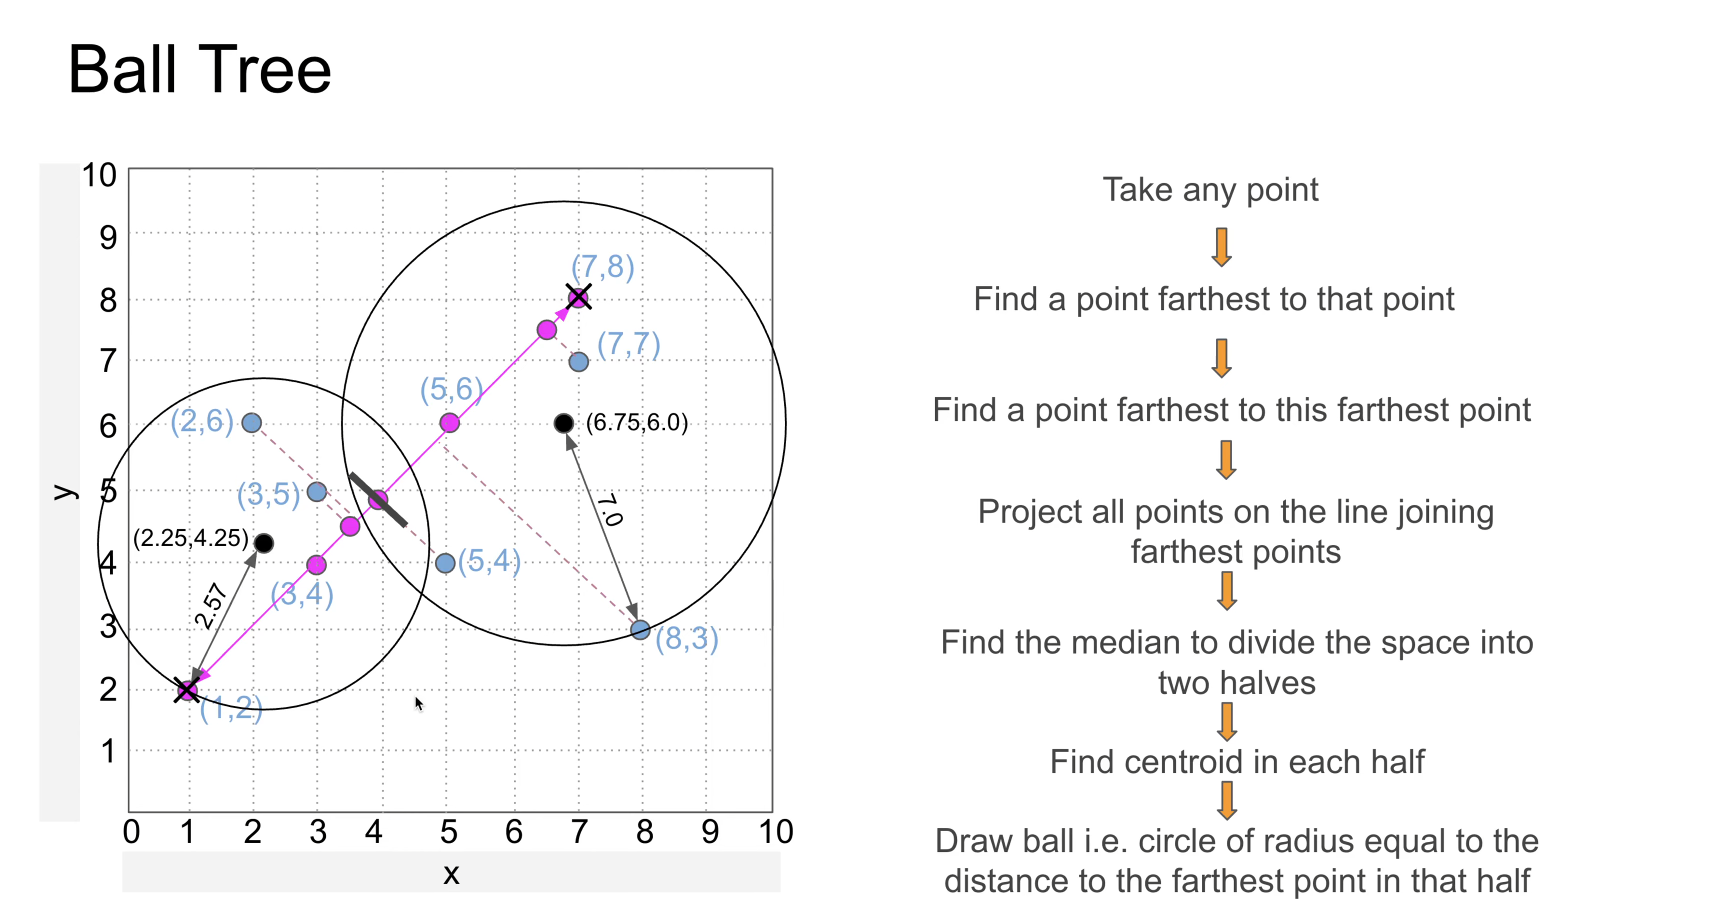

[Tutorial : Brute Force, KD Tree , Ball Tree](https://youtu.be/FnJj28u7rF0)